# Проект 2. Анализ данных успеваемости


 -   Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
 -    Посмотрите на распределение признака для числовых переменных, устраните выбросы.
 -    Оцените количество уникальных значений для номинативных переменных.
 -    По необходимости преобразуйте данные
 -    Проведите корреляционный анализ количественных переменных
 -    Отберите не коррелирующие переменные.
 -    Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
 -    Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

## Загрузка и первичный осмотр датафрейма

In [414]:
df = pd.read_csv('stud_math.csv')
display(df.head(10)) 
df.tail(10)

In [417]:
df.columns = [c.lower().strip().replace(', ', '_') for c in df.columns]
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [416]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school,sex,age,address,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,score
0,GP,F,18,U,4.0,4.0,at_home,teacher,course,mother,2.0,0.0,yes,no,yes,NaN,no,4.0,30.0
1,GP,F,17,U,1.0,1.0,at_home,other,course,father,2.0,0.0,no,no,yes,yes,no,3.0,30.0
2,GP,F,15,U,1.0,1.0,at_home,other,other,mother,2.0,3.0,yes,NaN,yes,yes,NaN,2.0,50.0
3,GP,F,15,U,4.0,2.0,health,NaN,home,mother,3.0,0.0,no,yes,yes,yes,yes,2.0,75.0
4,GP,F,16,U,3.0,3.0,other,other,home,father,2.0,0.0,no,yes,yes,no,no,2.0,50.0
5,GP,M,16,U,4.0,3.0,services,other,reputation,mother,2.0,0.0,no,yes,yes,yes,no,2.0,75.0
6,GP,M,16,NaN,2.0,2.0,other,other,home,mother,2.0,0.0,no,no,yes,yes,no,4.0,55.0
7,GP,F,17,U,4.0,4.0,other,teacher,home,mother,2.0,0.0,yes,no,yes,no,no,4.0,30.0
8,GP,M,15,U,3.0,2.0,services,other,home,mother,2.0,0.0,no,yes,yes,yes,no,2.0,95.0
9,GP,M,15,U,3.0,4.0,other,other,home,mother,2.0,0.0,no,yes,yes,yes,no,1.0,75.0


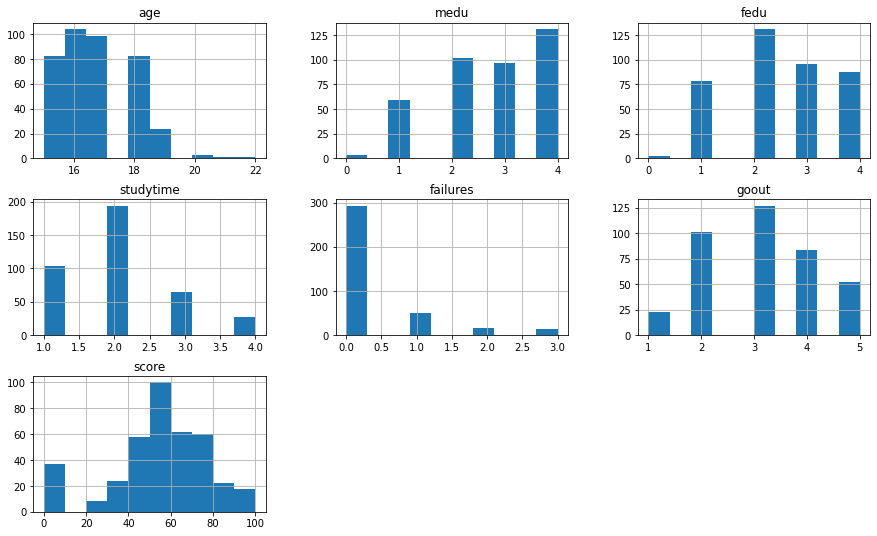

In [450]:
df.hist(figsize=(15,9));

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


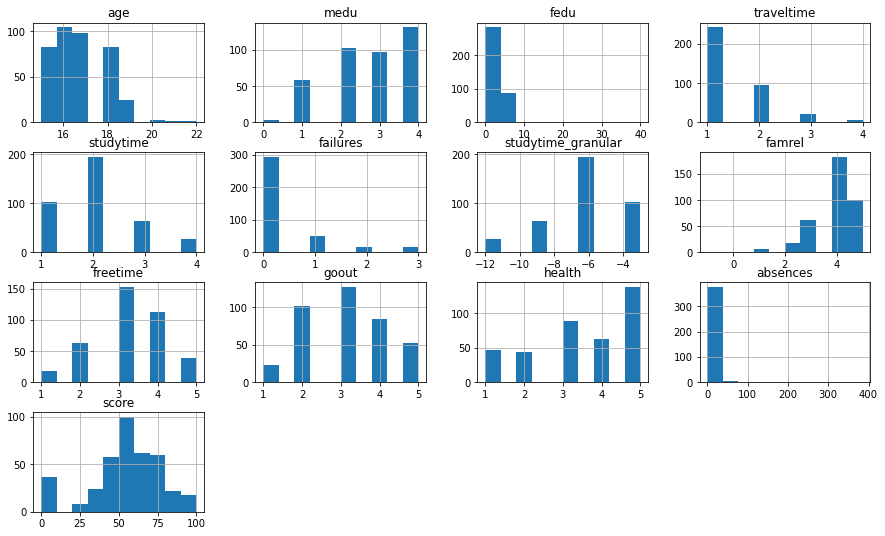

In [419]:
df.describe()

- age от 15 до 22 - в допустимых пределах.
- fedu ошибочное значение 40 (вероятно, опечатка)
- famrel ошибочное значение -1 (вероятно, опечатка)

In [448]:
# функция, которая показывает кол-во пустых значений в столбце и выводит их вместе с гистограммой всего столбца
def fix(column):
    if df[column].dtype == 'object':
        display(df[column].value_counts())
    print('В колонке', column, df[column].isna().sum(),'пустых значений')
    display(df.loc[df[column].isna()])
    df[column].hist()
    plt.show();
    

GP    349
MS     46
Name: school, dtype: int64

В колонке school 0 пустых значений


,school,sex,age,address,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,score


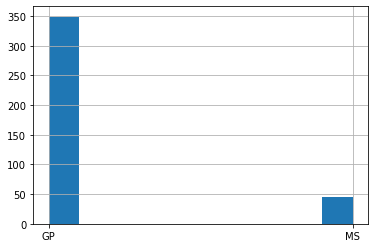

F    208
M    187
Name: sex, dtype: int64

В колонке sex 0 пустых значений


,school,sex,age,address,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,score


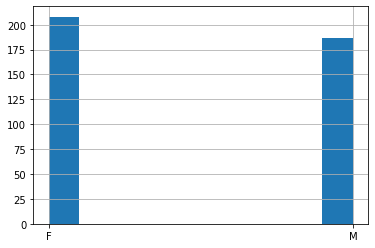

В колонке age 0 пустых значений


,school,sex,age,address,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,score


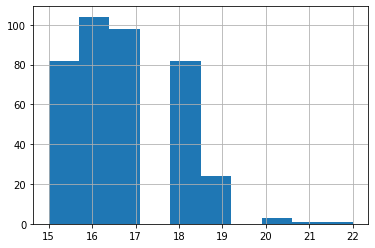

U    295
R     83
Name: address, dtype: int64

В колонке address 17 пустых значений


,school,sex,age,address,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,score
6,GP,M,16,NaN,2.0,2.0,other,other,home,mother,2.0,0.0,no,no,yes,yes,no,4.0,55.0
52,GP,M,15,NaN,4.0,2.0,health,NaN,other,father,1.0,1.0,no,no,yes,NaN,no,5.0,50.0
75,GP,M,15,NaN,4.0,3.0,teacher,other,home,mother,2.0,0.0,no,yes,yes,yes,NaN,3.0,50.0
92,GP,F,16,NaN,NaN,1.0,other,other,home,father,2.0,0.0,yes,no,yes,no,no,NaN,30.0
96,GP,M,16,NaN,4.0,3.0,services,other,reputation,mother,1.0,0.0,yes,NaN,NaN,yes,no,3.0,75.0
159,GP,M,16,NaN,3.0,2.0,other,services,course,father,2.0,1.0,no,yes,yes,yes,yes,5.0,60.0
168,GP,F,16,NaN,2.0,2.0,other,other,home,mother,2.0,0.0,no,yes,yes,yes,no,5.0,0.0
241,GP,M,17,NaN,4.0,4.0,teacher,other,course,mother,2.0,0.0,no,yes,yes,yes,no,NaN,60.0
254,GP,M,17,NaN,2.0,1.0,other,other,course,mother,1.0,0.0,no,no,yes,yes,no,2.0,60.0
270,GP,F,19,NaN,3.0,3.0,other,services,home,other,2.0,2.0,no,yes,yes,yes,no,5.0,NaN


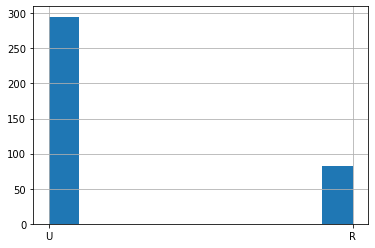

В колонке medu 3 пустых значений


,school,sex,age,address,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,score
92,GP,F,16,NaN,NaN,1.0,other,other,home,father,2.0,0.0,yes,no,yes,no,no,NaN,30.0
193,GP,M,16,R,NaN,3.0,services,services,reputation,mother,1.0,0.0,no,no,yes,yes,no,2.0,50.0
239,GP,M,18,U,NaN,2.0,other,services,reputation,father,2.0,1.0,no,no,no,NaN,NaN,4.0,0.0


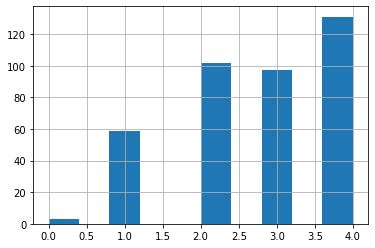

В колонке fedu 0 пустых значений


,school,sex,age,address,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,score


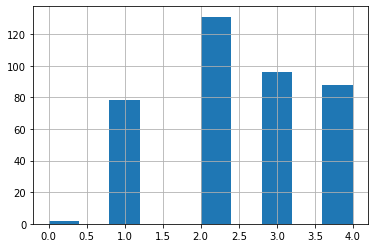

other       133
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64

В колонке mjob 19 пустых значений


,school,sex,age,address,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,score
29,GP,M,16,U,4.0,4.0,NaN,teacher,home,mother,2.0,0.0,no,yes,yes,yes,yes,5.0,55.0
54,GP,F,15,U,3.0,3.0,NaN,other,other,mother,1.0,NaN,no,yes,yes,yes,NaN,4.0,65.0
59,GP,F,16,U,4.0,2.0,NaN,NaN,course,mother,2.0,0.0,no,no,yes,yes,no,3.0,80.0
88,GP,M,16,U,2.0,2.0,NaN,other,reputation,father,2.0,1.0,no,yes,yes,yes,no,2.0,50.0
104,GP,M,15,U,3.0,4.0,NaN,other,course,mother,2.0,0.0,no,NaN,yes,yes,no,4.0,90.0
128,GP,M,18,R,2.0,2.0,NaN,other,reputation,mother,1.0,2.0,no,no,yes,yes,no,3.0,0.0
145,GP,F,15,U,1.0,1.0,NaN,services,course,father,2.0,0.0,no,yes,yes,yes,no,2.0,55.0
156,GP,M,17,R,1.0,2.0,NaN,other,reputation,mother,1.0,0.0,no,no,yes,no,no,2.0,65.0
166,GP,M,16,U,2.0,2.0,NaN,other,course,father,2.0,0.0,no,no,no,yes,no,5.0,50.0
174,GP,F,16,U,3.0,3.0,NaN,other,reputation,mother,2.0,0.0,no,yes,yes,yes,no,5.0,45.0


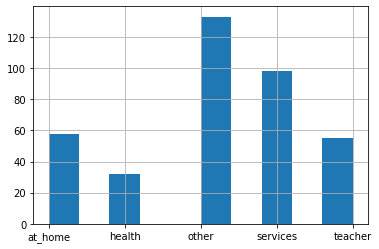

other       197
services    102
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64

В колонке fjob 36 пустых значений


,school,sex,age,address,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,score
3,GP,F,15,U,4.0,2.0,health,NaN,home,mother,3.0,0.0,no,yes,yes,yes,yes,2.0,75.0
17,GP,F,16,U,3.0,3.0,other,NaN,reputation,mother,NaN,0.0,yes,no,yes,no,no,2.0,50.0
22,GP,M,16,U,4.0,2.0,teacher,NaN,course,mother,2.0,0.0,no,no,yes,yes,no,1.0,80.0
26,GP,M,15,U,2.0,2.0,other,NaN,home,mother,1.0,0.0,no,NaN,yes,yes,NaN,2.0,55.0
31,GP,M,15,U,4.0,4.0,services,NaN,reputation,mother,2.0,0.0,no,NaN,yes,yes,no,1.0,85.0
44,GP,F,16,U,2.0,2.0,other,NaN,course,father,2.0,1.0,yes,no,yes,yes,no,3.0,45.0
47,GP,M,16,U,4.0,3.0,health,NaN,reputation,mother,4.0,0.0,no,no,yes,yes,no,2.0,100.0
52,GP,M,15,NaN,4.0,2.0,health,NaN,other,father,1.0,1.0,no,no,yes,NaN,no,5.0,50.0
59,GP,F,16,U,4.0,2.0,NaN,NaN,course,mother,2.0,0.0,no,no,yes,yes,no,3.0,80.0
68,GP,F,15,R,2.0,2.0,health,NaN,reputation,mother,2.0,NaN,yes,NaN,yes,yes,no,3.0,40.0


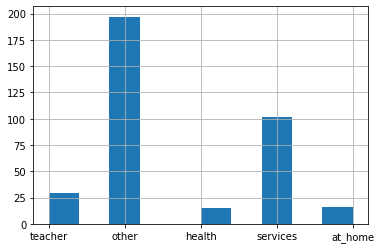

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

В колонке reason 17 пустых значений


,school,sex,age,address,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,score
33,GP,M,15,U,3.0,3.0,other,other,NaN,mother,2.0,0.0,no,no,yes,yes,no,2.0,60.0
63,GP,F,16,U,4.0,3.0,teacher,health,NaN,mother,3.0,0.0,yes,yes,yes,yes,no,4.0,45.0
73,GP,M,16,U,3.0,1.0,other,other,NaN,mother,1.0,0.0,no,no,yes,no,no,2.0,70.0
77,GP,F,16,U,2.0,2.0,other,other,NaN,mother,4.0,0.0,no,yes,yes,yes,yes,3.0,55.0
112,GP,F,16,U,2.0,2.0,at_home,other,NaN,mother,NaN,1.0,yes,no,yes,yes,NaN,2.0,65.0
137,GP,F,16,U,3.0,2.0,other,other,NaN,other,1.0,2.0,no,no,yes,yes,yes,2.0,0.0
138,GP,M,16,U,1.0,1.0,services,other,NaN,NaN,2.0,1.0,no,no,yes,no,yes,4.0,60.0
140,GP,M,15,U,4.0,3.0,teacher,services,NaN,father,4.0,0.0,yes,no,yes,yes,no,2.0,0.0
185,GP,M,17,U,3.0,3.0,services,services,NaN,mother,2.0,0.0,no,no,yes,NaN,yes,4.0,55.0
186,GP,M,16,U,1.0,2.0,services,services,NaN,mother,1.0,0.0,no,yes,yes,yes,yes,3.0,55.0


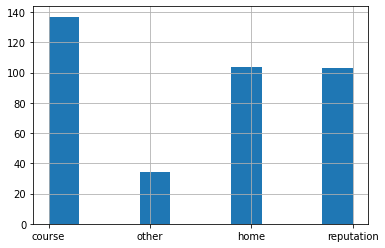

mother    250
father     86
other      28
Name: guardian, dtype: int64

В колонке guardian 31 пустых значений


,school,sex,age,address,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,score
38,GP,F,15,R,3.0,4.0,services,health,course,NaN,3.0,0.0,yes,yes,yes,yes,no,2.0,55.0
41,GP,M,15,U,4.0,4.0,teacher,other,home,NaN,1.0,0.0,no,no,yes,yes,NaN,3.0,60.0
49,GP,F,15,U,4.0,4.0,services,teacher,other,NaN,2.0,1.0,yes,no,yes,yes,no,4.0,35.0
53,GP,F,15,U,4.0,4.0,services,services,course,NaN,1.0,0.0,yes,yes,yes,yes,no,4.0,55.0
60,GP,F,16,R,4.0,4.0,health,teacher,other,NaN,2.0,0.0,no,no,yes,no,no,4.0,55.0
81,GP,M,15,U,2.0,3.0,other,other,home,NaN,3.0,0.0,yes,NaN,yes,yes,no,2.0,55.0
90,GP,F,16,U,3.0,3.0,other,other,home,NaN,3.0,0.0,no,yes,yes,yes,yes,3.0,40.0
98,GP,F,16,U,4.0,4.0,other,other,reputation,NaN,1.0,0.0,no,no,yes,NaN,no,4.0,70.0
138,GP,M,16,U,1.0,1.0,services,other,NaN,NaN,2.0,1.0,no,no,yes,no,yes,4.0,60.0
144,GP,M,17,U,2.0,1.0,other,other,home,NaN,1.0,3.0,no,no,yes,yes,no,5.0,0.0


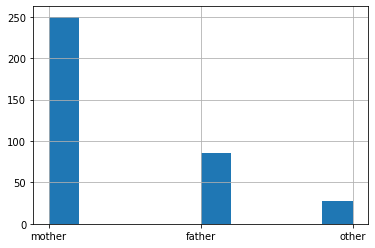

В колонке studytime 7 пустых значений


,school,sex,age,address,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,score
17,GP,F,16,U,3.0,3.0,other,NaN,reputation,mother,NaN,0.0,yes,no,yes,no,no,2.0,50.0
91,GP,F,15,U,4.0,3.0,services,other,reputation,mother,NaN,NaN,no,yes,yes,yes,no,5.0,90.0
112,GP,F,16,U,2.0,2.0,at_home,other,NaN,mother,NaN,1.0,yes,no,yes,yes,NaN,2.0,65.0
129,GP,M,16,R,4.0,4.0,teacher,teacher,course,mother,NaN,0.0,no,yes,yes,yes,no,5.0,90.0
227,GP,M,17,U,2.0,3.0,services,services,reputation,father,NaN,0.0,no,yes,NaN,yes,no,3.0,60.0
266,GP,M,17,U,3.0,1.0,services,NaN,other,mother,NaN,0.0,no,yes,yes,yes,NaN,4.0,50.0
314,GP,F,19,U,1.0,1.0,at_home,health,home,other,NaN,2.0,no,no,yes,yes,yes,2.0,65.0


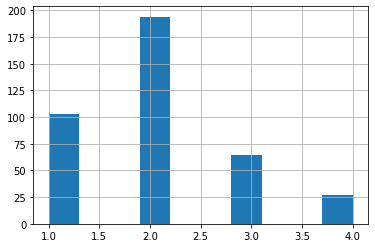

В колонке failures 22 пустых значений


,school,sex,age,address,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,score
21,GP,M,15,U,4.0,2.0,health,health,other,father,1.0,NaN,no,NaN,yes,yes,no,2.0,75.0
48,GP,M,15,U,4.0,2.0,teacher,other,home,mother,2.0,NaN,no,yes,NaN,no,no,3.0,70.0
54,GP,F,15,U,3.0,3.0,NaN,other,other,mother,1.0,NaN,no,yes,yes,yes,NaN,4.0,65.0
68,GP,F,15,R,2.0,2.0,health,NaN,reputation,mother,2.0,NaN,yes,NaN,yes,yes,no,3.0,40.0
91,GP,F,15,U,4.0,3.0,services,other,reputation,mother,NaN,NaN,no,yes,yes,yes,no,5.0,90.0
107,GP,M,16,U,3.0,3.0,services,NaN,home,father,3.0,NaN,no,no,yes,yes,no,3.0,90.0
108,GP,M,15,R,4.0,4.0,other,other,home,father,4.0,NaN,no,yes,yes,yes,yes,5.0,65.0
114,GP,M,15,R,2.0,1.0,health,services,reputation,mother,2.0,NaN,no,no,yes,yes,yes,2.0,45.0
115,GP,M,16,U,4.0,4.0,teacher,teacher,course,father,2.0,NaN,no,no,yes,NaN,no,4.0,80.0
125,GP,M,15,U,3.0,4.0,services,services,home,father,1.0,NaN,yes,no,yes,NaN,no,5.0,60.0


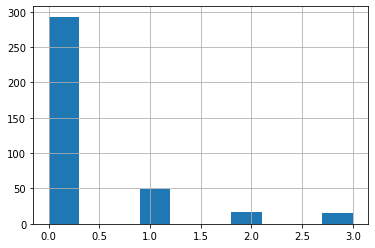

no     335
yes     51
Name: schoolsup, dtype: int64

В колонке schoolsup 9 пустых значений


,school,sex,age,address,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,score
27,GP,M,15,U,4.0,2.0,health,services,other,mother,1.0,0.0,NaN,yes,yes,yes,NaN,4.0,75.0
35,GP,F,15,U,2.0,3.0,other,other,other,father,1.0,0.0,NaN,no,yes,no,no,1.0,30.0
79,GP,F,16,U,3.0,4.0,at_home,other,course,mother,2.0,0.0,NaN,no,yes,yes,no,3.0,25.0
151,GP,M,16,U,2.0,1.0,at_home,NaN,course,mother,1.0,1.0,NaN,no,yes,no,yes,4.0,70.0
211,GP,M,17,U,4.0,4.0,services,other,home,mother,2.0,0.0,NaN,yes,yes,yes,yes,5.0,65.0
274,GP,F,17,U,2.0,4.0,at_home,health,reputation,mother,2.0,0.0,NaN,yes,yes,yes,yes,3.0,50.0
321,GP,F,17,U,2.0,2.0,other,other,course,mother,2.0,0.0,NaN,no,yes,no,yes,2.0,45.0
392,MS,M,21,R,1.0,1.0,other,other,course,NaN,1.0,3.0,NaN,no,NaN,no,no,3.0,35.0
394,MS,M,19,U,1.0,1.0,other,at_home,NaN,father,1.0,0.0,NaN,no,yes,yes,no,3.0,45.0


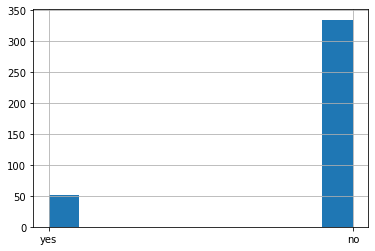

no     200
yes    155
Name: paid, dtype: int64

В колонке paid 40 пустых значений


,school,sex,age,address,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,score
2,GP,F,15,U,1.0,1.0,at_home,other,other,mother,2.0,3.0,yes,NaN,yes,yes,NaN,2.0,50.0
18,GP,M,17,U,3.0,2.0,services,services,course,mother,1.0,3.0,no,NaN,yes,yes,no,5.0,25.0
19,GP,M,16,U,4.0,3.0,health,other,home,father,1.0,0.0,no,NaN,yes,yes,no,3.0,50.0
21,GP,M,15,U,4.0,2.0,health,health,other,father,1.0,NaN,no,NaN,yes,yes,no,2.0,75.0
26,GP,M,15,U,2.0,2.0,other,NaN,home,mother,1.0,0.0,no,NaN,yes,yes,NaN,2.0,55.0
31,GP,M,15,U,4.0,4.0,services,NaN,reputation,mother,2.0,0.0,no,NaN,yes,yes,no,1.0,85.0
51,GP,F,15,U,4.0,2.0,health,other,other,mother,2.0,0.0,no,NaN,yes,yes,NaN,3.0,65.0
57,GP,M,15,U,4.0,2.0,teacher,health,reputation,mother,2.0,0.0,no,NaN,yes,no,no,2.0,75.0
68,GP,F,15,R,2.0,2.0,health,NaN,reputation,mother,2.0,NaN,yes,NaN,yes,yes,no,3.0,40.0
81,GP,M,15,U,2.0,3.0,other,other,home,NaN,3.0,0.0,yes,NaN,yes,yes,no,2.0,55.0


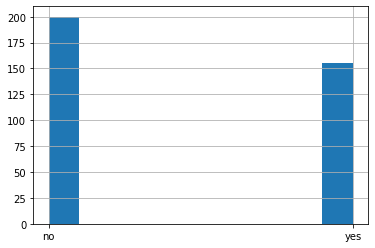

yes    356
no      19
Name: higher, dtype: int64

В колонке higher 20 пустых значений


,school,sex,age,address,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,score
34,GP,M,16,U,3.0,2.0,other,other,home,mother,1.0,0.0,no,yes,NaN,yes,no,3.0,75.0
48,GP,M,15,U,4.0,2.0,teacher,other,home,mother,2.0,NaN,no,yes,NaN,no,no,3.0,70.0
76,GP,M,15,U,4.0,0.0,teacher,other,course,mother,4.0,0.0,no,no,NaN,yes,no,3.0,50.0
84,GP,F,15,U,1.0,1.0,other,other,home,father,2.0,0.0,no,no,NaN,yes,no,2.0,50.0
96,GP,M,16,NaN,4.0,3.0,services,other,reputation,mother,1.0,0.0,yes,NaN,NaN,yes,no,3.0,75.0
142,GP,F,15,U,4.0,2.0,teacher,services,course,mother,3.0,0.0,no,yes,NaN,yes,no,2.0,55.0
149,GP,M,15,U,2.0,1.0,services,other,course,mother,1.0,3.0,no,no,NaN,yes,no,5.0,50.0
158,GP,M,16,R,2.0,2.0,at_home,other,course,mother,1.0,NaN,no,no,NaN,no,no,2.0,75.0
170,GP,M,16,U,3.0,4.0,other,other,course,father,1.0,NaN,no,no,NaN,yes,no,5.0,0.0
171,GP,M,16,U,1.0,0.0,other,other,reputation,mother,2.0,NaN,no,yes,NaN,yes,yes,2.0,80.0


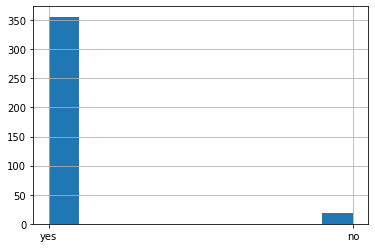

yes    305
no      56
Name: internet, dtype: int64

В колонке internet 34 пустых значений


,school,sex,age,address,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,score
0,GP,F,18,U,4.0,4.0,at_home,teacher,course,mother,2.0,0.0,yes,no,yes,NaN,no,4.0,30.0
12,GP,M,15,U,4.0,4.0,health,services,course,father,1.0,0.0,no,yes,yes,NaN,no,3.0,70.0
52,GP,M,15,NaN,4.0,2.0,health,NaN,other,father,1.0,1.0,no,no,yes,NaN,no,5.0,50.0
65,GP,F,16,U,4.0,3.0,teacher,services,course,mother,2.0,0.0,no,no,yes,NaN,no,3.0,75.0
80,GP,M,15,U,2.0,3.0,other,services,course,father,1.0,0.0,yes,yes,yes,NaN,yes,2.0,60.0
86,GP,F,16,U,2.0,2.0,at_home,other,course,mother,2.0,0.0,no,no,yes,NaN,no,4.0,30.0
98,GP,F,16,U,4.0,4.0,other,other,reputation,NaN,1.0,0.0,no,no,yes,NaN,no,4.0,70.0
110,GP,M,15,U,4.0,4.0,teacher,teacher,course,mother,1.0,0.0,no,no,yes,NaN,no,3.0,95.0
115,GP,M,16,U,4.0,4.0,teacher,teacher,course,father,2.0,NaN,no,no,yes,NaN,no,4.0,80.0
117,GP,M,16,U,3.0,3.0,other,services,home,father,1.0,0.0,no,no,yes,NaN,no,2.0,65.0


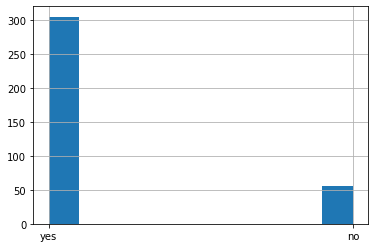

no     240
yes    124
Name: romantic, dtype: int64

В колонке romantic 31 пустых значений


,school,sex,age,address,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,score
2,GP,F,15,U,1.0,1.0,at_home,other,other,mother,2.0,3.0,yes,NaN,yes,yes,NaN,2.0,50.0
13,GP,M,15,U,4.0,3.0,teacher,other,course,mother,2.0,0.0,no,yes,yes,yes,NaN,3.0,55.0
26,GP,M,15,U,2.0,2.0,other,NaN,home,mother,1.0,0.0,no,NaN,yes,yes,NaN,2.0,55.0
27,GP,M,15,U,4.0,2.0,health,services,other,mother,1.0,0.0,NaN,yes,yes,yes,NaN,4.0,75.0
41,GP,M,15,U,4.0,4.0,teacher,other,home,NaN,1.0,0.0,no,no,yes,yes,NaN,3.0,60.0
51,GP,F,15,U,4.0,2.0,health,other,other,mother,2.0,0.0,no,NaN,yes,yes,NaN,3.0,65.0
54,GP,F,15,U,3.0,3.0,NaN,other,other,mother,1.0,NaN,no,yes,yes,yes,NaN,4.0,65.0
67,GP,F,16,U,3.0,2.0,services,other,course,mother,4.0,0.0,yes,yes,yes,yes,NaN,3.0,30.0
75,GP,M,15,NaN,4.0,3.0,teacher,other,home,mother,2.0,0.0,no,yes,yes,yes,NaN,3.0,50.0
112,GP,F,16,U,2.0,2.0,at_home,other,NaN,mother,NaN,1.0,yes,no,yes,yes,NaN,2.0,65.0


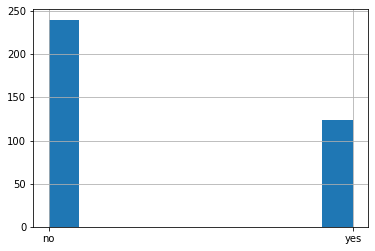

В колонке goout 8 пустых значений


,school,sex,age,address,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,score
89,GP,M,16,U,4.0,4.0,teacher,health,reputation,mother,2.0,0.0,no,no,yes,no,no,NaN,35.0
92,GP,F,16,NaN,NaN,1.0,other,other,home,father,2.0,0.0,yes,no,yes,no,no,NaN,30.0
200,GP,F,16,U,4.0,3.0,health,other,home,mother,2.0,0.0,no,NaN,yes,yes,no,NaN,80.0
202,GP,F,17,U,1.0,1.0,other,other,course,mother,2.0,0.0,no,yes,yes,no,no,NaN,50.0
221,GP,F,17,U,1.0,1.0,at_home,other,reputation,mother,3.0,1.0,no,no,yes,no,yes,NaN,0.0
241,GP,M,17,NaN,4.0,4.0,teacher,other,course,mother,2.0,0.0,no,yes,yes,yes,no,NaN,60.0
312,GP,M,19,U,1.0,2.0,other,services,course,other,2.0,1.0,no,no,yes,yes,no,NaN,NaN
322,GP,F,17,R,2.0,2.0,services,services,course,mother,3.0,0.0,no,yes,yes,yes,no,NaN,55.0


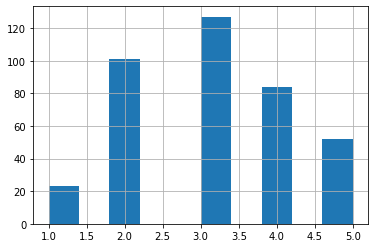

В колонке score 6 пустых значений


,school,sex,age,address,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,score
201,GP,F,16,U,2.0,3.0,other,other,reputation,mother,2.0,0.0,yes,NaN,yes,no,no,3.0,NaN
244,GP,F,18,U,2.0,1.0,other,other,course,other,3.0,0.0,no,yes,yes,yes,yes,4.0,NaN
270,GP,F,19,NaN,3.0,3.0,other,services,home,other,2.0,2.0,no,yes,yes,yes,no,5.0,NaN
283,GP,F,18,U,1.0,1.0,other,other,home,mother,2.0,0.0,yes,no,yes,yes,no,4.0,NaN
312,GP,M,19,U,1.0,2.0,other,services,course,other,2.0,1.0,no,no,yes,yes,no,NaN,NaN
350,MS,M,19,NaN,1.0,1.0,other,services,home,other,2.0,3.0,no,no,yes,yes,no,4.0,NaN


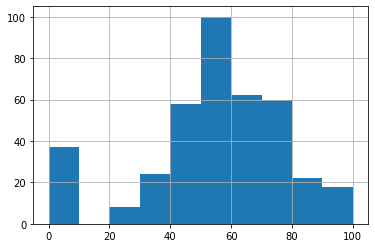

In [449]:
for column in df.columns:
    fix(column) 

In [ ]:
len(df.dropna())

В данных много пустых значений, и они находятся в разных строках. Удалить все нельзя, т.к. это значительная часть данных. 

Удалим строки с пустыми score, так как это целевая переменная. Также заменим пару заведомо ошибочных значений. 
Возможность заполнения других пустых значений, определим после анализа корреляций и выбора удаляемых колонок.

In [454]:
df = df[df['score'].notna()] #удаляем отсутствующие строки по колонке score так как это целевая переменная
df.loc[df['famrel'] < 0, 'famrel'] = df.famrel.median()
df.loc[df['fedu'] == 40, 'fedu'] = np.nan

AttributeError: 'DataFrame' object has no attribute 'famrel'

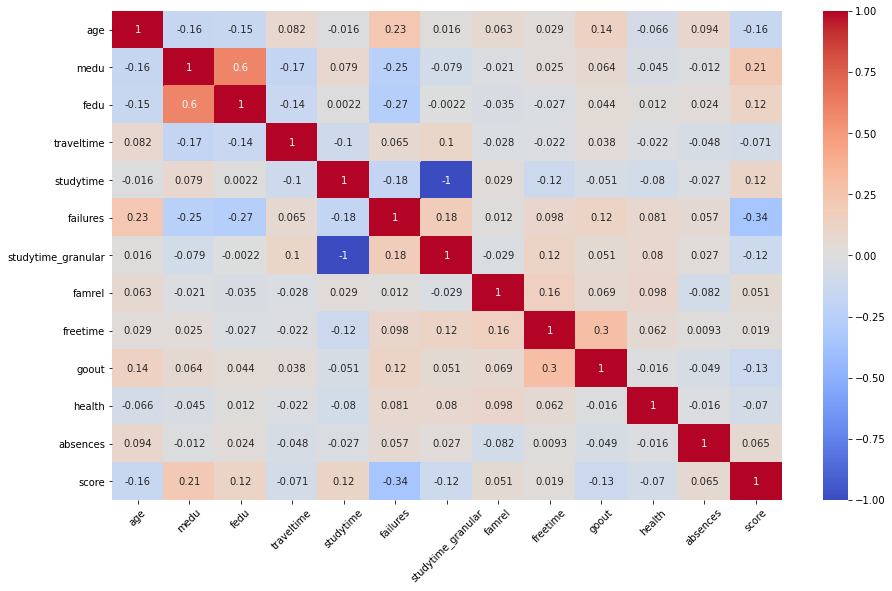

In [432]:
correlation = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.xticks(rotation=45);

Из таблицы видно, что studytime_granular полностью коррелирует с studytime, поэтому мы его удаляем.
Также принимаем решение удалить колонки, коэффициент корреляции которых со score менее 0.1.

In [433]:
delete = correlation[np.abs(correlation.score) < 0.1].index.tolist() # нашел имена колонок с низкой корреляцией.
delete.append('studytime_granular')
delete

['traveltime',
 'famrel',
 'freetime',
 'health',
 'absences',
 'studytime_granular']

In [434]:
df = df[[c for c in df.columns.tolist() if c not in delete]]
df

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,goout,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,2.0,0.0,no,yes,no,no,no,yes,yes,no,3.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,2.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,2.0,0.0,no,yes,yes,no,yes,yes,no,no,2.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,2.0,2.0,no,yes,yes,no,yes,yes,no,no,4.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,1.0,0.0,no,no,no,no,no,yes,yes,no,5.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,3.0,NaN,no,no,no,no,NaN,no,no,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,1.0,0.0,no,no,no,NaN,no,yes,yes,no,1.0,50.0


In [438]:
df.isna().sum()

school         0
sex            0
age            0
address       17
famsize       27
pstatus       45
medu           3
fedu           0
mjob          19
fjob          36
reason        17
guardian      31
studytime      7
failures      22
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
higher        20
internet      34
romantic      31
goout          8
score          6
dtype: int64

Выводим зависимости оценки от категориальных параметров

In [440]:
category = df.columns[df.dtypes == 'object'].tolist() # ищу все колонки с типом object
category

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,goout,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,30.0


In [441]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (8, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index)],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    

,mean,median,std,count,min,max
,score,score,score,score,score,score
school,,,,,,
GP,52.630814,55.0,23.116772,344,0.0,100.0
MS,49.444444,50.0,21.379212,45,0.0,95.0


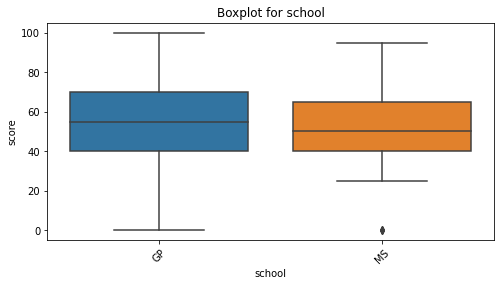

,mean,median,std,count,min,max
,score,score,score,score,score,score
sex,,,,,,
F,50.098039,55.0,23.070682,204,0.0,95.0
M,54.648649,55.0,22.572608,185,0.0,100.0


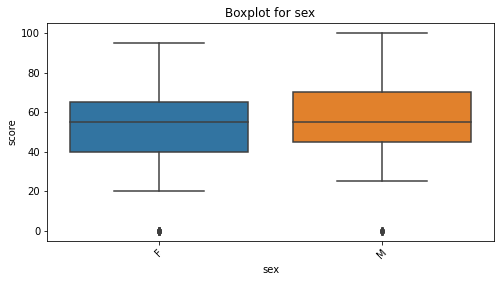

,mean,median,std,count,min,max
,score,score,score,score,score,score
address,,,,,,
R,46.927711,50.0,23.148926,83,0.0,95.0
U,53.573883,55.0,22.824908,291,0.0,100.0


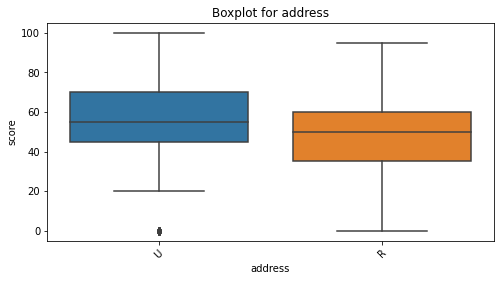

,mean,median,std,count,min,max
,score,score,score,score,score,score
famsize,,,,,,
GT3,51.509804,55.0,23.388513,255,0.0,100.0
LE3,54.672897,55.0,21.360242,107,0.0,95.0


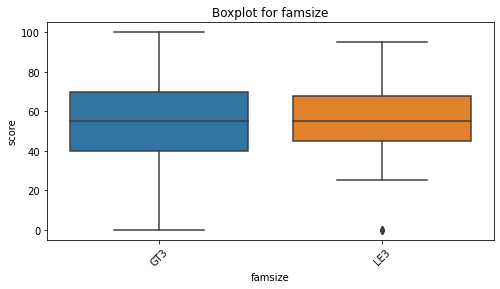

,mean,median,std,count,min,max
,score,score,score,score,score,score
pstatus,,,,,,
A,55.138889,55.0,22.312268,36,0.0,95.0
T,51.704545,55.0,22.970035,308,0.0,100.0


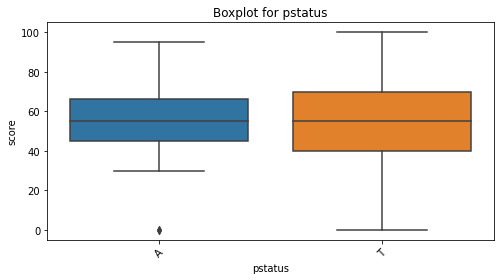

,mean,median,std,count,min,max
,score,score,score,score,score,score
mjob,,,,,,
at_home,45.689655,50.0,23.868210,58,0.0,95.0
health,60.625000,65.0,21.580681,32,0.0,100.0
other,49.527559,55.0,21.698082,127,0.0,95.0
services,54.744898,55.0,23.068393,98,0.0,95.0
teacher,55.181818,55.0,22.463213,55,0.0,95.0


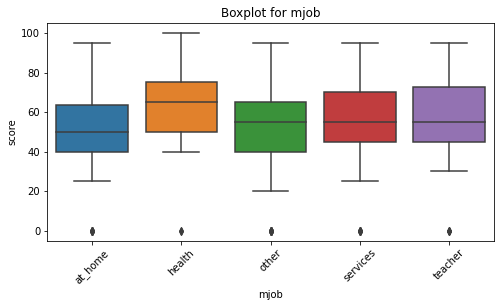

,mean,median,std,count,min,max
,score,score,score,score,score,score
fjob,,,,,,
at_home,51.875000,55.0,25.876308,16,0.0,95.0
health,55.666667,55.0,14.984119,15,35.0,80.0
other,51.417526,55.0,21.985061,194,0.0,95.0
services,50.454545,55.0,21.666429,99,0.0,90.0
teacher,59.827586,70.0,27.434427,29,0.0,95.0


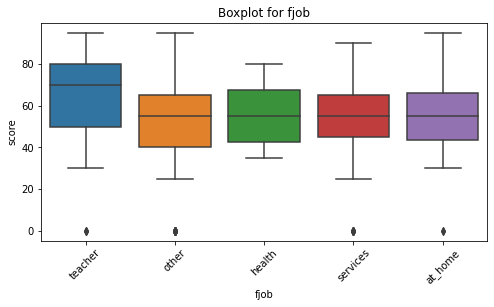

,mean,median,std,count,min,max
,score,score,score,score,score,score
reason,,,,,,
course,49.814815,50.0,23.841888,135,0.0,95.0
home,51.188119,55.0,23.865755,101,0.0,95.0
other,55.882353,55.0,19.363766,34,0.0,95.0
reputation,55.637255,55.0,21.568123,102,0.0,100.0


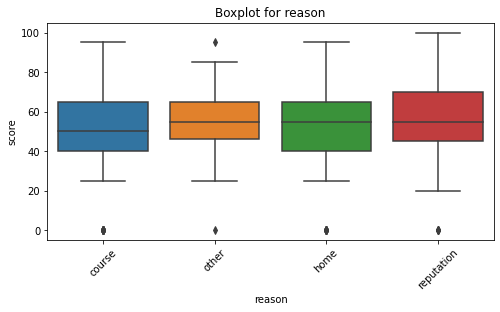

,mean,median,std,count,min,max
,score,score,score,score,score,score
guardian,,,,,,
father,53.430233,55.0,22.664583,86,0.0,90.0
mother,52.600806,55.0,23.464805,248,0.0,100.0
other,45.625000,50.0,24.375348,24,0.0,90.0


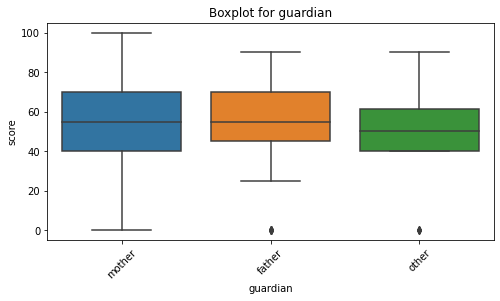

,mean,median,std,count,min,max
,score,score,score,score,score,score
schoolsup,,,,,,
no,53.126888,55.0,23.953153,331,0.0,100.0
yes,47.040816,50.0,14.610155,49,0.0,85.0


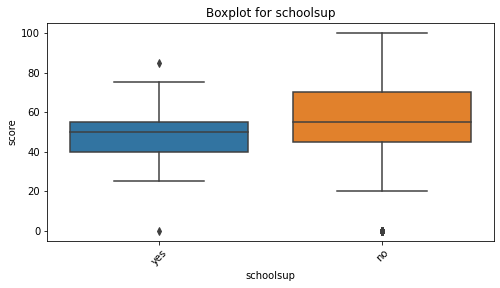

,mean,median,std,count,min,max
,score,score,score,score,score,score
famsup,,,,,,
no,52.074074,55.0,23.997708,135,0.0,100.0
yes,51.712963,55.0,22.962680,216,0.0,95.0


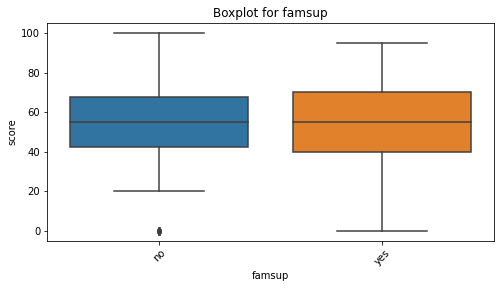

,mean,median,std,count,min,max
,score,score,score,score,score,score
paid,,,,,,
no,50.35533,55.0,25.522612,197,0.0,100.0
yes,55.00000,55.0,19.313889,153,0.0,95.0


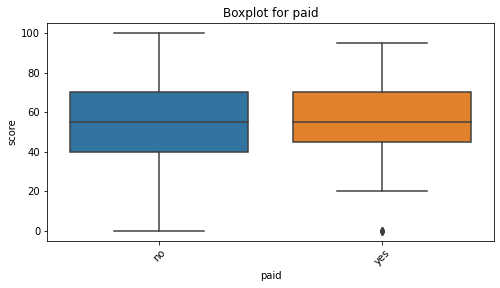

,mean,median,std,count,min,max
,score,score,score,score,score,score
activities,,,,,,
no,52.185792,55.0,22.357692,183,0.0,95.0
yes,52.682292,55.0,23.568283,192,0.0,100.0


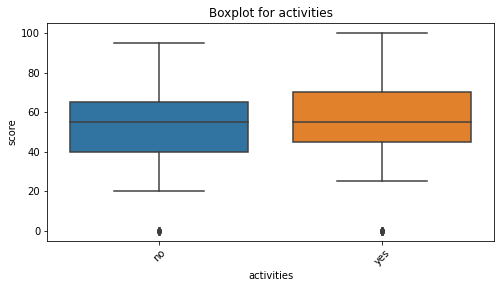

,mean,median,std,count,min,max
,score,score,score,score,score,score
nursery,,,,,,
no,50.000000,55.0,22.492689,77,0.0,90.0
yes,52.962963,55.0,22.745848,297,0.0,100.0


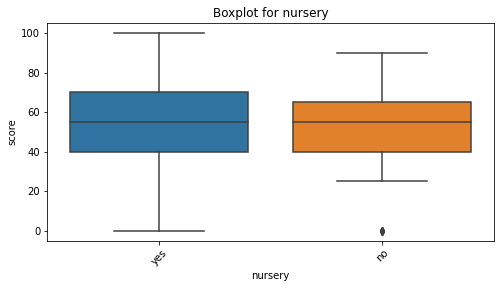

,mean,median,std,count,min,max
,score,score,score,score,score,score
higher,,,,,,
no,33.684211,40.0,24.767929,19,0.0,65.0
yes,53.100000,55.0,22.676339,350,0.0,100.0


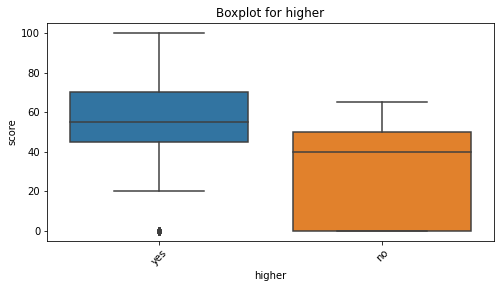

,mean,median,std,count,min,max
,score,score,score,score,score,score
internet,,,,,,
no,49.090909,50.0,22.028830,55,0.0,90.0
yes,53.116667,55.0,22.691837,300,0.0,100.0


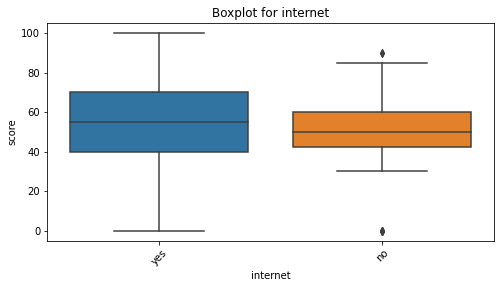

,mean,median,std,count,min,max
,score,score,score,score,score,score
romantic,,,,,,
no,54.574468,55.0,22.126042,235,0.0,100.0
yes,47.682927,55.0,24.564174,123,0.0,90.0


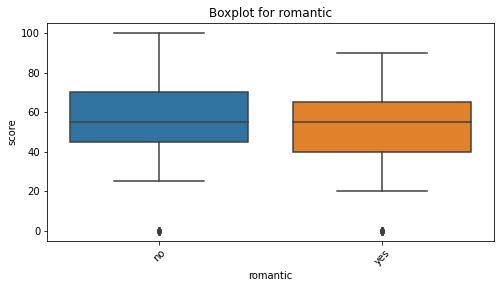

In [442]:
for cat in category:
    display(df[[cat]+['score']].pivot_table(index=cat, values = 'score', aggfunc = ['mean', 'median', 'std', 'count', 'min', 'max'])) 
    get_boxplot(cat)
    
    

In [452]:
a = ['nursery', 'activities', 'famsup', 'pstatus','famsize'] # удаляем колонки от которых score мало зависит
df = df[[c for c in df.columns.tolist() if c not in a]]
df

,school,sex,age,address,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,score
0,GP,F,18,U,4.0,4.0,at_home,teacher,course,mother,2.0,0.0,yes,no,yes,NaN,no,4.0,30.0
1,GP,F,17,U,1.0,1.0,at_home,other,course,father,2.0,0.0,no,no,yes,yes,no,3.0,30.0
2,GP,F,15,U,1.0,1.0,at_home,other,other,mother,2.0,3.0,yes,NaN,yes,yes,NaN,2.0,50.0
3,GP,F,15,U,4.0,2.0,health,NaN,home,mother,3.0,0.0,no,yes,yes,yes,yes,2.0,75.0
4,GP,F,16,U,3.0,3.0,other,other,home,father,2.0,0.0,no,yes,yes,no,no,2.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,2.0,2.0,services,services,course,NaN,2.0,2.0,no,yes,yes,no,no,4.0,45.0
391,MS,M,17,U,3.0,1.0,services,services,course,mother,1.0,0.0,no,no,yes,yes,no,5.0,80.0
392,MS,M,21,R,1.0,1.0,other,other,course,NaN,1.0,3.0,NaN,no,NaN,no,no,3.0,35.0
393,MS,M,18,R,3.0,2.0,services,other,course,mother,1.0,0.0,no,no,yes,yes,no,1.0,50.0


Заменяем все пропуски на медиану в столбцах с типом float, кроме столбца failures (т.к он наиболее сильно коррелирует сo score и такая замена может исказить результат).
Столбцы с типом object:  address, mjob, fjob, reason, guardian, failures, schoolsup, paid, higher, internet, romantic не трогаем, чтобы не искажать данные, а в случае необходимости их тоже можно заменить на медианы. 

In [457]:
lis = ['medu', 'fedu', 'studytime', 'goout']
                                           
for column in lis:                  
    df.loc[df[column].isna(), column] = df[column].median() 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   school     389 non-null    object 
 1   sex        389 non-null    object 
 2   age        389 non-null    int64  
 3   address    374 non-null    object 
 4   medu       389 non-null    float64
 5   fedu       389 non-null    float64
 6   mjob       370 non-null    object 
 7   fjob       353 non-null    object 
 8   reason     372 non-null    object 
 9   guardian   358 non-null    object 
 10  studytime  389 non-null    float64
 11  failures   367 non-null    float64
 12  schoolsup  380 non-null    object 
 13  paid       350 non-null    object 
 14  higher     369 non-null    object 
 15  internet   355 non-null    object 
 16  romantic   358 non-null    object 
 17  goout      389 non-null    float64
 18  score      389 non-null    float64
dtypes: float64(6), int64(1), object(12)
memory usage: 

## Выводы:

Мы анализируем набор данных успеваемости из 395 записей с целью подготовки для последующего построения модели.

1. Мы удалили строки с пустыми значениями целевого параметра score, исправили заведомо ошибочные значения и заполнили пустые значения в большинстве числовых столбцов на медианы.
2. Удалены столбцы, которые слабо коррелируют с результатом: 'traveltime', 'famrel', 'freetime', 'health', 'absences', 'nursery', 'activities', 'famsup', 'pstatus','famsize'. Также 'studytime_granular' полностью коррелирует с 'studytime' и удален.
3. Анализ данных показывает, что сильнее всего связаны со score:
    - числовые столбцы: failures, medu, age
    - номинативные столбцы: address, mjob, fjob, schoolsup, higher
    Однако, все корреляции не слишком сильные, и для моделей нужно использовать совокупность параметров.